## 1. Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_curve, auc
)

## 2. Настройка отображения графиков


In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

## 3. Загрузка и первичный анализ данных


In [3]:
# Загрузка данных
df = pd.read_csv("/kaggle/input/prostate-cancer-dataset/prostate.csv")

# Первые 5 строк
print("Первые 5 строк данных:")
print(df.head())

# Информация о данных
print("\nИнформация о данных:")
print(df.info())

# Описательная статистика
print("\nОписательная статистика:")
print(df.describe())

# Проверка на пропущенные значения
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())


Первые 5 строк данных:
     lcavol   lweight  age      lbph       lcp  gleason  pgg45      lpsa  \
0 -0.579818  2.769459   50 -1.386294 -1.386294        6      0 -0.430783   
1 -0.994252  3.319626   58 -1.386294 -1.386294        6      0 -0.162519   
2 -0.510826  2.691243   74 -1.386294 -1.386294        7     20 -0.162519   
3 -1.203973  3.282789   58 -1.386294 -1.386294        6      0 -0.162519   
4  0.751416  3.432373   62 -1.386294 -1.386294        6      0  0.371564   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   lcp      97 non-null     float64
 5   gleason  97 non-null     int64  
 6   pgg45    97 non

## 4. Визуализация распределения целевой переменной


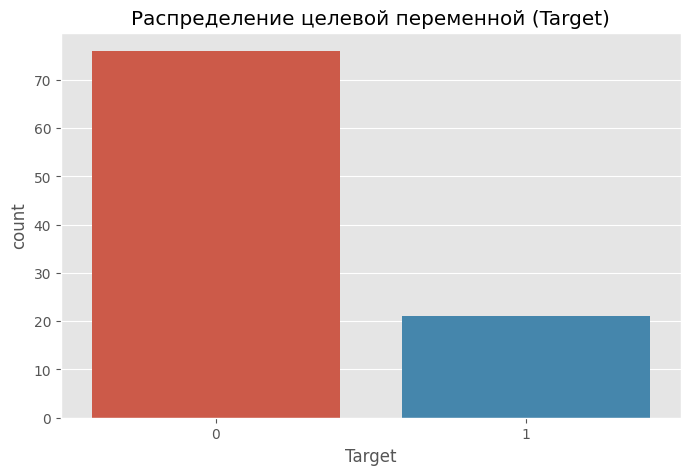

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=df)
plt.title('Распределение целевой переменной (Target)')
plt.show()

## 5. Подготовка данных


In [5]:
# Разделение на признаки и целевую переменную
X = df.drop('Target', axis=1)
y = df['Target']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Модель 1: kNN с подбором гиперпараметров


In [6]:
# Поиск оптимального k
param_grid_knn = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Лучший параметр
best_k = knn_cv.best_params_['n_neighbors']
print(f"\nОптимальное количество соседей (k): {best_k}")

# Обучение и предсказание
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Оценка модели
print("\nОценка модели kNN:")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_knn))
print(f"Точность: {accuracy_score(y_test, y_pred_knn):.4f}")


Оптимальное количество соседей (k): 3

Оценка модели kNN:
Матрица ошибок:
[[19  5]
 [ 3  3]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.77      0.73      0.75        30

Точность: 0.7333


# 7. Модель 2: Random Forest с подбором гиперпараметров


In [7]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Лучшие параметры
print("\nОптимальные параметры для Random Forest:")
print(rf_cv.best_params_)

# Обучение и предсказание
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Оценка модели
print("\nОценка модели Random Forest:")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_rf))
print(f"Точность: {accuracy_score(y_test, y_pred_rf):.4f}")


Оптимальные параметры для Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Оценка модели Random Forest:
Матрица ошибок:
[[22  2]
 [ 3  3]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.60      0.50      0.55         6

    accuracy                           0.83        30
   macro avg       0.74      0.71      0.72        30
weighted avg       0.82      0.83      0.83        30

Точность: 0.8333


## 8. Сравнение моделей: ROC-кривые

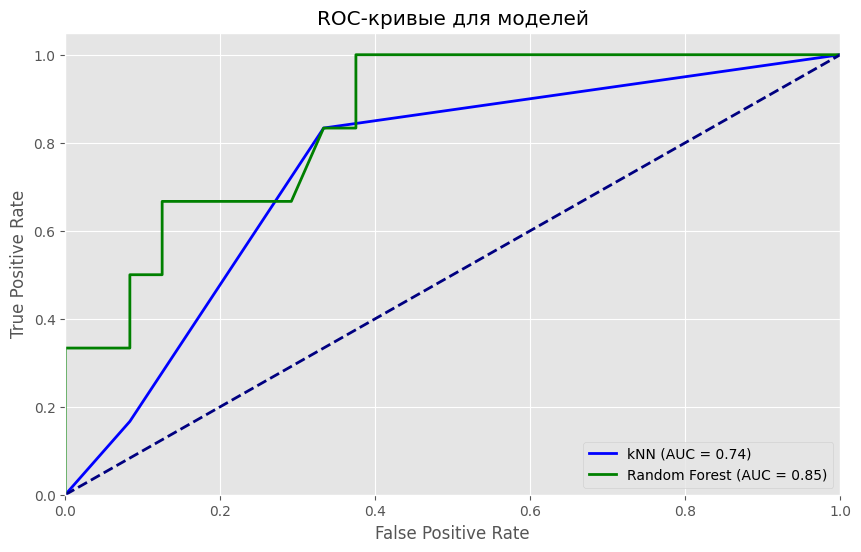

In [8]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend(loc="lower right")
plt.show()

## 9. Важность признаков (Random Forest)

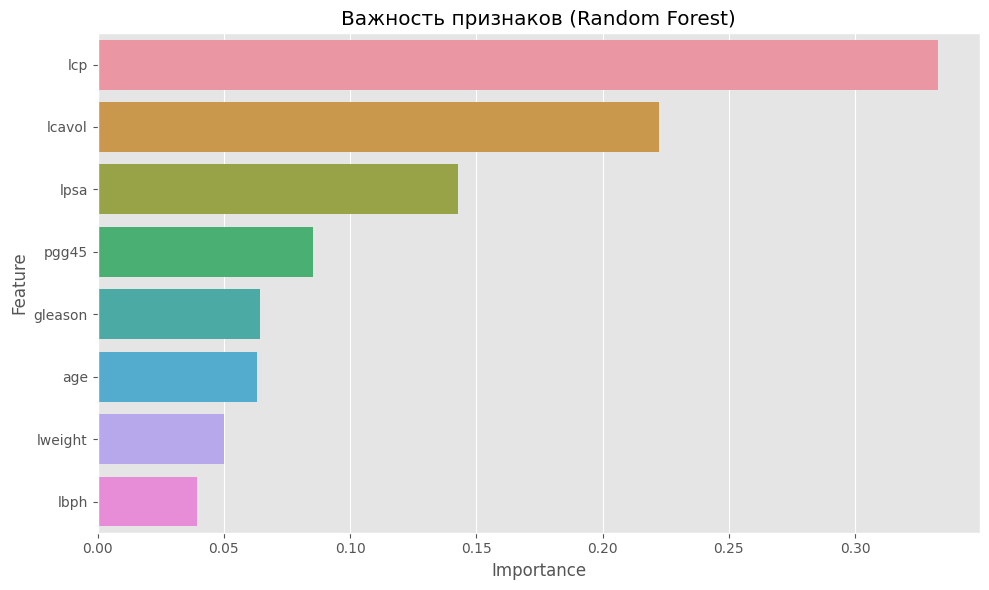

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков (Random Forest)')
plt.tight_layout()
plt.show()

# 10. Выводы

In [10]:
print("\nВыводы:")
print("1. Обе модели показали хорошие результаты на тестовых данных.")
print(f"2. Точность kNN: {accuracy_score(y_test, y_pred_knn):.4f}, Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("3. Random Forest показал лучше результаты по AUC (0.74 - kNN, 0.85 - random forest)")
print("4. Для класса 0 (отсутствие болезни) обе модели работают хорошо (точность 86-88%)")
print("5. Для класса 1 (наличие болезни) результаты хуже (точность 38-60%)")
print("6. Random Forest совершил на 3 ошибки меньше (5 vs 2 для класса 0, 3 vs 3 для класса 1)")


print("\nЛучшая модель: Random Forest")


Выводы:
1. Обе модели показали хорошие результаты на тестовых данных.
2. Точность kNN: 0.7333, Random Forest: 0.8333
3. Random Forest показал лучше результаты по AUC (0.74 - kNN, 0.85 - random forest)
4. Для класса 0 (отсутствие болезни) обе модели работают хорошо (точность 86-88%)
5. Для класса 1 (наличие болезни) результаты хуже (точность 38-60%)
6. Random Forest совершил на 3 ошибки меньше (5 vs 2 для класса 0, 3 vs 3 для класса 1)

Лучшая модель: Random Forest
